In [1]:
# Find Features

In [2]:
import os
import ROOT
from ROOT import TMVA
os.environ["KERAS_BACKEND"] = "tensorflow"
import pandas as pd
from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Welcome to JupyROOT 6.18/02


In [3]:
data_path = "data/Higgs_data.root"
df_signalTree = read_root(data_path, "sig_tree")
df_backgroundTree = read_root(data_path, "bkg_tree")

raw_cols = ['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag',
       'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', 'jet3_pt', 'jet3_eta',
       'jet3_phi', 'jet3_btag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']
man_cols = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [4]:
def square(a,b):
    return a*a + b*b

# y / x
def angle(a,b):
    return np.arctan2(b,a)

In [5]:
# add flag data
# 1: signal
# 2: no signal
df_signalTree['y'] = 1
df_backgroundTree['y'] = 0
df_all = pd.concat([df_signalTree, df_backgroundTree])

In [6]:
df_all['A'] = np.exp(square(df_all['lepton_pT'], df_all['lepton_eta']))
df_all['Aangle'] = angle(df_all['lepton_pT'], df_all['lepton_eta'])
df_all['B'] = square(df_all['lepton_pT'], df_all['missing_energy_magnitude'])
df_all['Bangle'] = angle(df_all['lepton_pT'], df_all['missing_energy_magnitude'])
df_all['C'] = square(df_all['lepton_pT'], df_all['jet1_pt'])
df_all['Cangle'] = angle(df_all['lepton_pT'], df_all['jet1_pt'])
df_all['D'] = square(df_all['lepton_pT'], df_all['jet4_pt'])
df_all['Dangle'] = angle(df_all['lepton_pT'], df_all['jet4_pt'])
df_all['E'] = square(df_all['missing_energy_magnitude'], df_all['jet1_pt'])
df_all['Eangle'] = angle(df_all['missing_energy_magnitude'], df_all['jet1_pt'])
df_all['F'] = square(df_all['missing_energy_magnitude'], df_all['jet2_pt'])
df_all['Fangle'] = angle(df_all['missing_energy_magnitude'], df_all['jet2_pt'])

df_all['Z'] = square(df_all['m_jlv'], df_all['m_bb'])
df_all['Zangle'] = angle(df_all['m_jlv'], df_all['m_bb'])

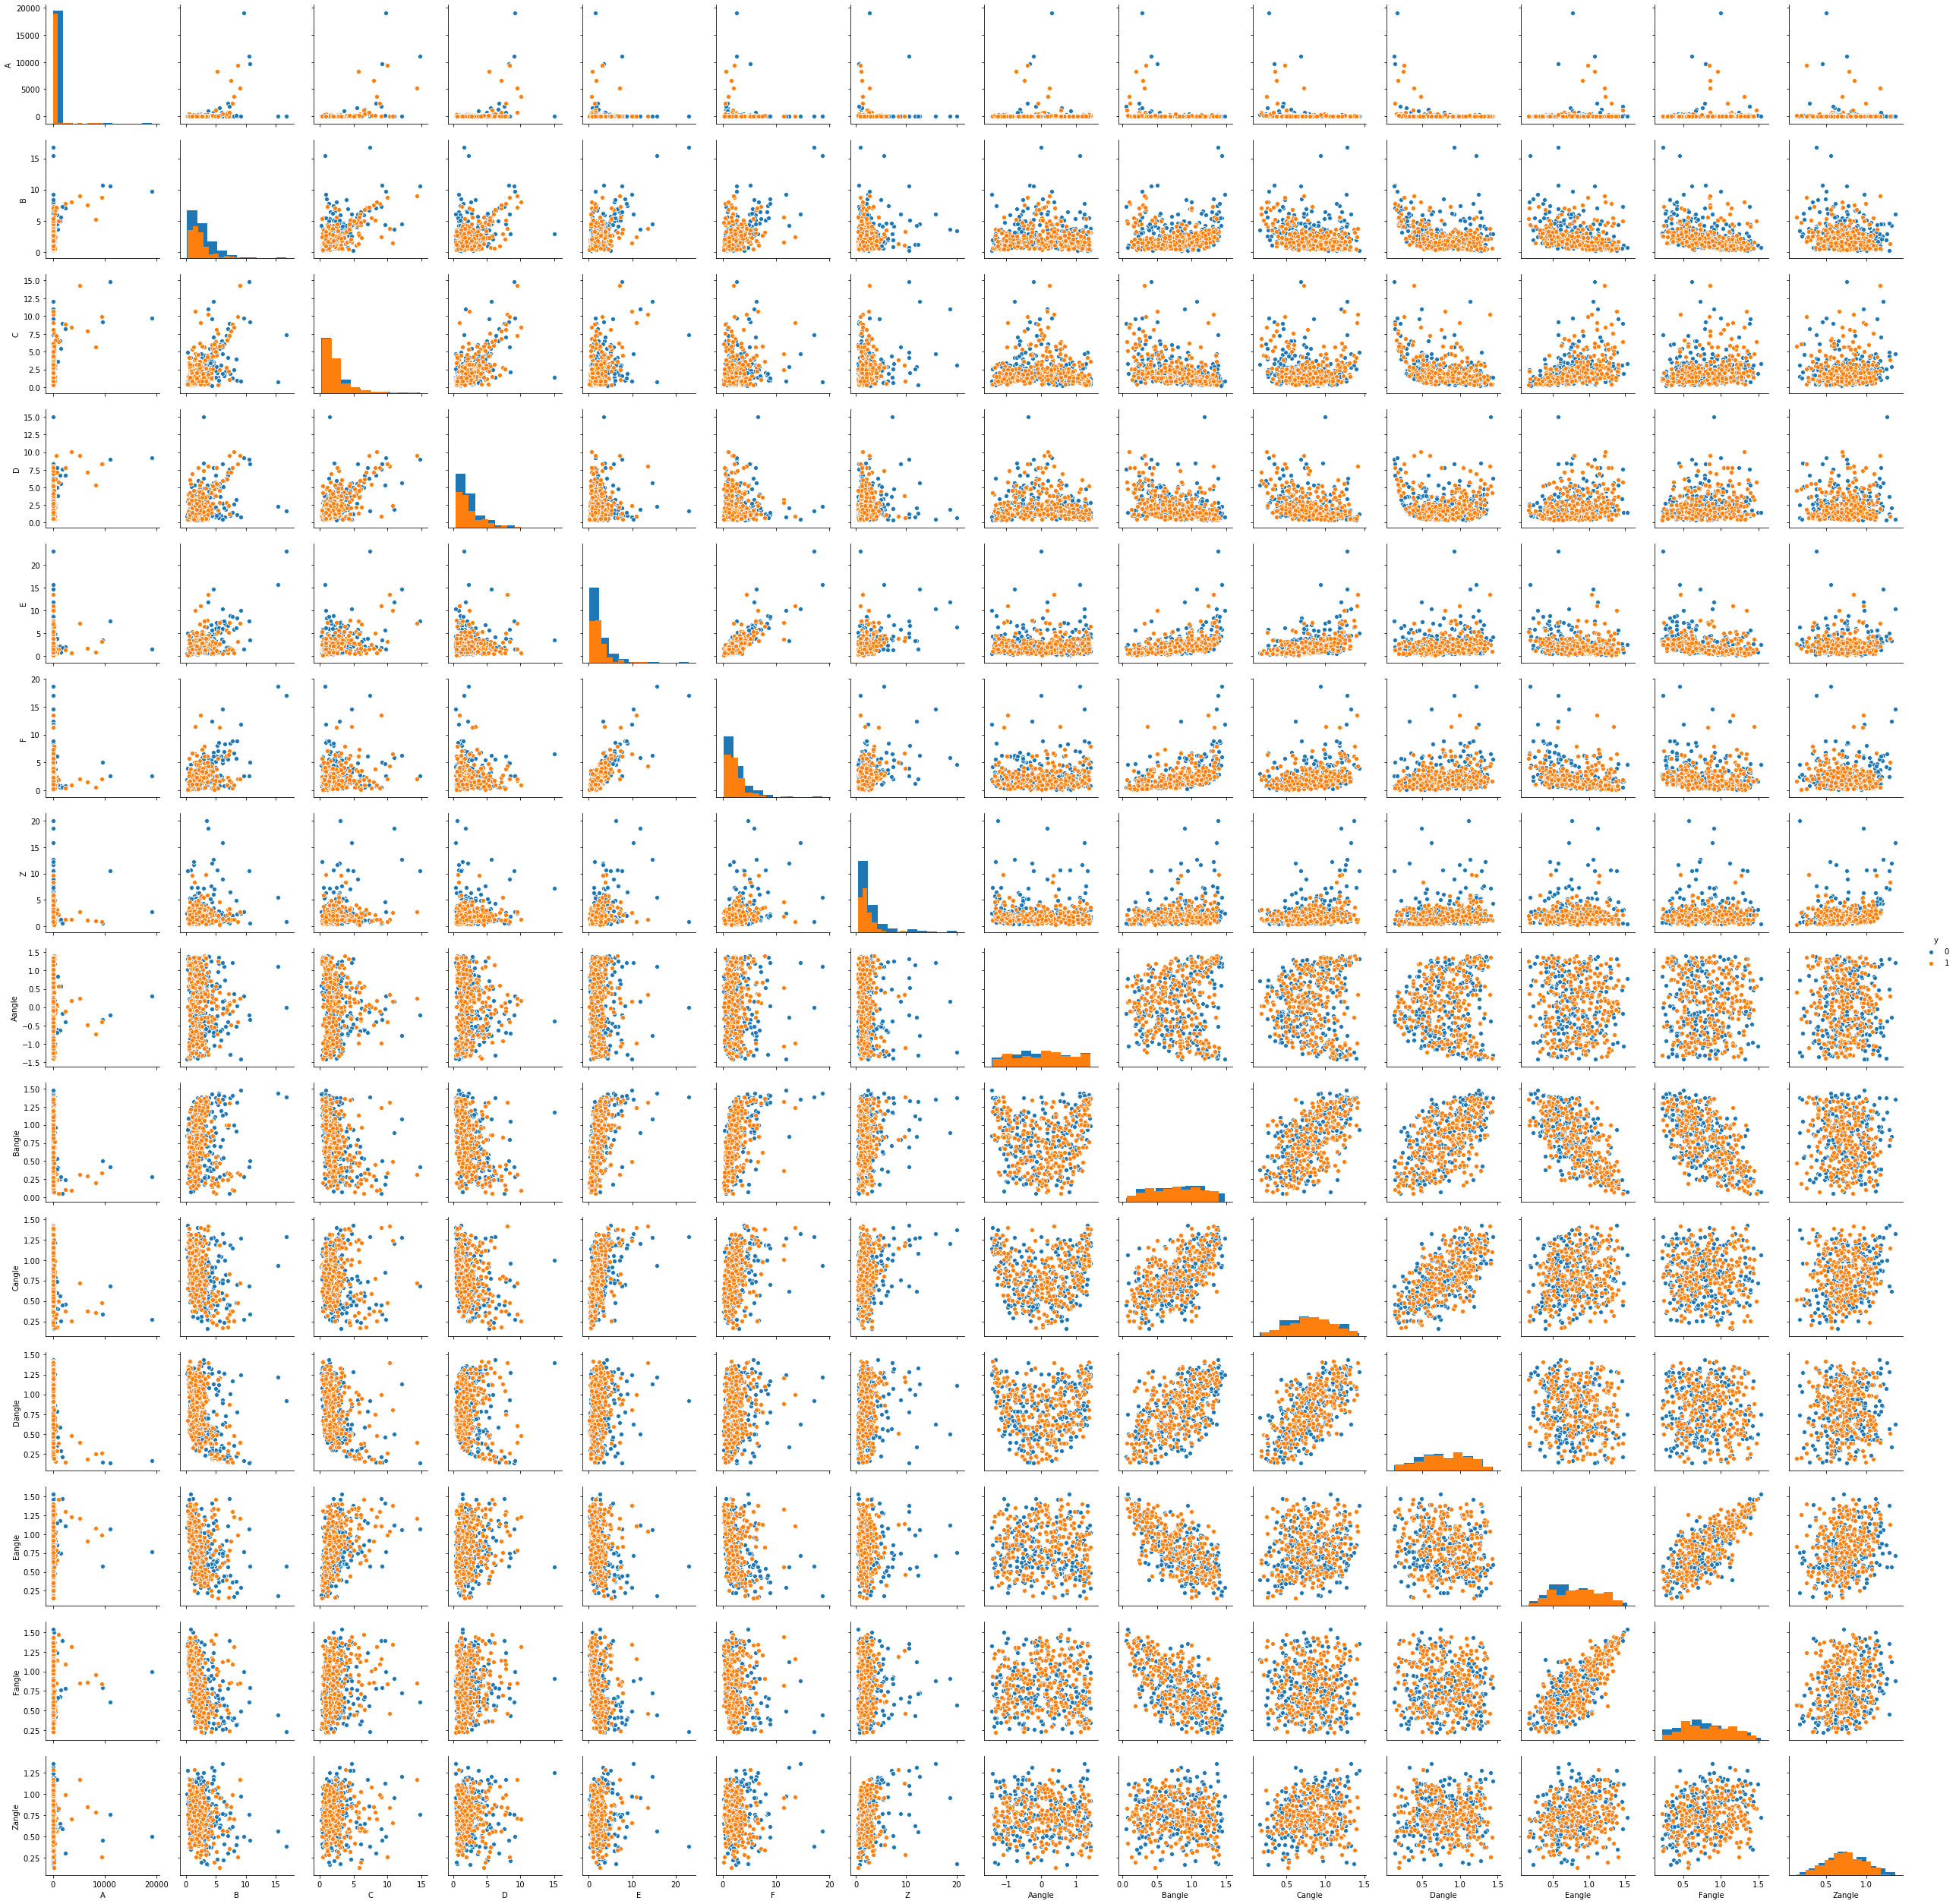

In [8]:
use_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Aangle', 'Bangle', 'Cangle', 'Dangle', 'Eangle',
            'Fangle', 'Zangle']

sample_size = 500
random_state = 42

pairplot_new_features = sns.pairplot(data = df_all[use_cols + ['y']].sample(n = sample_size, random_state = random_state), 
             vars = use_cols,  
             hue = 'y', 
             diag_kind = 'hist')
pairplot_new_features.fig.savefig('figures/pairplot_new_features.png')